In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datasets:

## Train:



In [71]:
file_url = lambda f_type: f'https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/{f_type}.csv?raw=true'
train = pd.read_csv(file_url('train'))  
train


datetime  season  holiday  workingday  weather   temp  \
0     2011-07-11 00:00:00       3        0           1        1  28.70   
1     2012-05-18 22:00:00       2        0           1        1  22.96   
2     2011-04-01 23:00:00       2        0           1        1  12.30   
3     2012-09-16 09:00:00       3        0           0        1  23.78   
4     2011-02-01 23:00:00       1        0           1        3   8.20   
...                   ...     ...      ...         ...      ...    ...   
8159  2012-01-14 02:00:00       1        0           0        1   6.56   
8160  2011-12-10 09:00:00       4        0           0        1  11.48   
8161  2011-12-18 16:00:00       4        0           0        1  11.48   
8162  2011-02-19 07:00:00       1        0           0        1  15.58   
8163  2012-05-02 07:00:00       2        0           1        2  22.14   

       atemp  humidity  windspeed  pollution  sunlight   traffic  count  
0     32.575        65    12.9980   5.354100    28.701  0.000000     35  
1     26.515        52    22.0028  85.425233    22.961  0.004489    251  
2     15.910        61     6.0032   2.040899    12.301  0.000242     53  
3     27.275        60     8.9981  26.682772    23.781  0.004489    296  
4      9.850        93    12.9980   5.851754     8.201  0.000000     16  
...      ...       ...        ...        ...       ...       ...    ...  
8159   8.335        47    11.0014  14.953355     6.561  0.004489     38  
8160  12.880        61    19.0012   7.977025    11.481  0.000000    149  
8161  13.635        48    16.9979   6.916512    11.481  0.015615    234  
8162  19.695        17    35.0008   0.095445    15.581  0.000242     22  
8163  25.760        88    12.9980  81.965417    22.141  0.015615    358  

[8164 rows x 13 columns]

We will save a list of columns in order to compare to final added features after preprocessing and feature selection.

In [72]:
initial_df_cols = train.columns

## Test:

In [73]:
test = pd.read_csv(file_url('test'))
test

datetime  season  holiday  workingday  weather   temp  \
0     2011-07-19 11:00:00       3        0           1        1  33.62   
1     2012-01-16 06:00:00       1        1           0        1   4.10   
2     2011-12-11 18:00:00       4        0           0        1   9.84   
3     2012-08-15 10:00:00       3        0           1        2  29.52   
4     2012-06-15 23:00:00       2        0           1        1  25.42   
...                   ...     ...      ...         ...      ...    ...   
2717  2011-03-19 15:00:00       1        0           0        1  20.50   
2718  2012-01-08 16:00:00       1        0           0        1  16.40   
2719  2011-07-11 05:00:00       3        0           1        1  27.06   
2720  2011-07-16 08:00:00       3        0           0        1  27.06   
2721  2011-01-01 12:00:00       1        0           0        1  17.22   

       atemp  humidity  windspeed   pollution  sunlight   traffic  count  
0     40.150        59     0.0000   10.317020    33.621  0.015615    127  
1      6.820        54     6.0032    3.502209     4.101  0.004489     13  
2     11.365        48    12.9980   25.945915     9.841  0.000000    163  
3     34.090        62    12.9980  116.935908    29.521  0.004489    233  
4     31.060        53    16.9979  120.824789    25.421  0.015615    222  
...      ...       ...        ...         ...       ...       ...    ...  
2717  24.240        29    27.9993   44.665581    20.501  0.000242    313  
2718  20.455        37    19.9995   31.090380    16.401  0.000000    314  
2719  31.060        74     8.9981    1.075298    27.061  0.015615     26  
2720  31.060        65    11.0014    2.291586    27.061  0.004489    127  
2721  21.210        77    19.0012    8.940201    17.221  0.015615     84  

[2722 rows x 13 columns]

# date-time feature engineering:

In [74]:
type(train['datetime'][0])

str

Before continuing EDA and preprocessing, we can see that the datetime feature is of type string, and that it is formatted in the timestamp pandas object format. 
We will use this object format to change the type to timestamp, and use that object to get additional information such as:


*   Year
*   Month
*   Day
* Hour 
* Day of the week
* Day of year
* Week of year



In [75]:
def add_datetime_and_weekdays(df, add_weekend=False):
    df['datetime'] =  pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')
    # Adding year, month, day, hour, minute, second featuresa
    df['year']= df['datetime'].dt.year
    df['month']= df['datetime'].dt.month 
    df['day_of_year'] = df['datetime'].dt.day_of_year
    df['week_of_year'] = df['datetime'].dt.isocalendar().week.astype('int')
    df['day_of_week'] = df['datetime'].dt.weekday

    # avoid zero values where they don't mean zero
    df['day_of_month']= df['datetime'].dt.day + 1
    df['hour']= df['datetime'].dt.hour + 1
 
    if add_weekend:
      weekend_days = (6,7)
      df['is_weekend'] = [1 if (day in weekend_days) else 0 for day in df.day_of_week]
      
    return df


dw_mapping = ['Monday', 'Tuesday', 'Wednesday',
              'Thursday', 'Friday','Saturday', 'Sunday']

# helper method for plotting with day name instead of number
def get_day_name(day_index):
    return dw_mapping[day_index - 1]


In [76]:
# keep original columns
original_columns = train.drop('count', axis=1).columns
train = add_datetime_and_weekdays(train, add_weekend=True)
test = add_datetime_and_weekdays(test, add_weekend=True)



In [77]:
type(train['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### set the datetime as the data index:

In [78]:
train = train.set_index(['datetime'])
test = test.set_index(['datetime'])

In [79]:
# move count to the end of df

def move_count_last(df:pd.DataFrame):
    i = df.columns.tolist().index('count')
    all_index = list(range(len(df.columns)))
    all_index[i] = all_index[-1]
    all_index[-1] = i
    df = df.iloc[:,all_index]
    return df

train = move_count_last(train)
test = move_count_last(test)

# Part 1- "Explore the Data" (EDA)
## Dataset for EDA:

In [80]:
train

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-07-11 00:00:00       3        0           1        1  28.70  32.575   
2012-05-18 22:00:00       2        0           1        1  22.96  26.515   
2011-04-01 23:00:00       2        0           1        1  12.30  15.910   
2012-09-16 09:00:00       3        0           0        1  23.78  27.275   
2011-02-01 23:00:00       1        0           1        3   8.20   9.850   
...                     ...      ...         ...      ...    ...     ...   
2012-01-14 02:00:00       1        0           0        1   6.56   8.335   
2011-12-10 09:00:00       4        0           0        1  11.48  12.880   
2011-12-18 16:00:00       4        0           0        1  11.48  13.635   
2011-02-19 07:00:00       1        0           0        1  15.58  19.695   
2012-05-02 07:00:00       2        0           1        2  22.14  25.760   

                     humidity  windspeed  pollution  sunlight   traffic  \
datetime                                                                  
2011-07-11 00:00:00        65    12.9980   5.354100    28.701  0.000000   
2012-05-18 22:00:00        52    22.0028  85.425233    22.961  0.004489   
2011-04-01 23:00:00        61     6.0032   2.040899    12.301  0.000242   
2012-09-16 09:00:00        60     8.9981  26.682772    23.781  0.004489   
2011-02-01 23:00:00        93    12.9980   5.851754     8.201  0.000000   
...                       ...        ...        ...       ...       ...   
2012-01-14 02:00:00        47    11.0014  14.953355     6.561  0.004489   
2011-12-10 09:00:00        61    19.0012   7.977025    11.481  0.000000   
2011-12-18 16:00:00        48    16.9979   6.916512    11.481  0.015615   
2011-02-19 07:00:00        17    35.0008   0.095445    15.581  0.000242   
2012-05-02 07:00:00        88    12.9980  81.965417    22.141  0.015615   

                     is_weekend  year  month  day_of_year  week_of_year  \
datetime                                                                  
2011-07-11 00:00:00           0  2011      7          192            28   
2012-05-18 22:00:00           0  2012      5          139            20   
2011-04-01 23:00:00           0  2011      4           91            13   
2012-09-16 09:00:00           1  2012      9          260            37   
2011-02-01 23:00:00           0  2011      2           32             5   
...                         ...   ...    ...          ...           ...   
2012-01-14 02:00:00           0  2012      1           14             2   
2011-12-10 09:00:00           0  2011     12          344            49   
2011-12-18 16:00:00           1  2011     12          352            50   
2011-02-19 07:00:00           0  2011      2           50             7   
2012-05-02 07:00:00           0  2012      5          123            18   

                     day_of_week  day_of_month  hour  count  
datetime                                                     
2011-07-11 00:00:00            0            12     1     35  
2012-05-18 22:00:00            4            19    23    251  
2011-04-01 23:00:00            4             2    24     53  
2012-09-16 09:00:00            6            17    10    296  
2011-02-01 23:00:00            1             2    24     16  
...                          ...           ...   ...    ...  
2012-01-14 02:00:00            5            15     3     38  
2011-12-10 09:00:00            5            11    10    149  
2011-12-18 16:00:00            6            19    17    234  
2011-02-19 07:00:00            5            20     8     22  
2012-05-02 07:00:00            2             3     8    358  

[8164 rows x 20 columns]

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8164 entries, 2011-07-11 00:00:00 to 2012-05-02 07:00:00
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        8164 non-null   int64  
 1   holiday       8164 non-null   int64  
 2   workingday    8164 non-null   int64  
 3   weather       8164 non-null   int64  
 4   temp          8164 non-null   float64
 5   atemp         8164 non-null   float64
 6   humidity      8164 non-null   int64  
 7   windspeed     8164 non-null   float64
 8   pollution     8164 non-null   float64
 9   sunlight      8164 non-null   float64
 10  traffic       8164 non-null   float64
 11  is_weekend    8164 non-null   int64  
 12  year          8164 non-null   int64  
 13  month         8164 non-null   int64  
 14  day_of_year   8164 non-null   int64  
 15  week_of_year  8164 non-null   int64  
 16  day_of_week   8164 non-null   int64  
 17  day_of_month  8164 non-null   int64

We can see that all datatypes are of type int or float, and that there is no null data, meaning **we won't have to deal with null imputation in this data set!**

In [82]:
train.describe()

season      holiday   workingday      weather         temp  \
count  8164.000000  8164.000000  8164.000000  8164.000000  8164.000000   
mean      2.510289     0.029397     0.683244     1.415483    20.244980   
std       1.117178     0.168928     0.465240     0.631242     7.796018   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    20.500000   
75%       4.000000     0.000000     1.000000     2.000000    26.240000   
max       4.000000     1.000000     1.000000     4.000000    41.000000   

             atemp     humidity    windspeed    pollution     sunlight  \
count  8164.000000  8164.000000  8164.000000  8164.000000  8164.000000   
mean     23.670160    61.835130    12.791334    47.152120    20.245980   
std       8.468725    19.255791     8.213914    72.882602     7.796018   
min       0.760000     0.000000     0.000000     0.000304     0.821000   
25%      16.665000    47.000000     7.001500     3.693188    13.941000   
50%      24.240000    62.000000    12.998000    17.684113    20.501000   
75%      31.060000    77.000000    16.997900    59.257746    26.241000   
max      45.455000   100.000000    56.996900   754.304876    41.001000   

           traffic   is_weekend         year        month  day_of_year  \
count  8164.000000  8164.000000  8164.000000  8164.000000  8164.000000   
mean      0.004986     0.143190  2011.502205     6.533562   177.881921   
std       0.006319     0.350288     0.500026     3.439504   104.908462   
min       0.000000     0.000000  2011.000000     1.000000     1.000000   
25%       0.000000     0.000000  2011.000000     4.000000    92.000000   
50%       0.000242     0.000000  2012.000000     7.000000   183.000000   
75%       0.004489     0.000000  2012.000000    10.000000   275.000000   
max       0.015615     1.000000  2012.000000    12.000000   354.000000   

       week_of_year  day_of_week  day_of_month         hour        count  
count   8164.000000  8164.000000   8164.000000  8164.000000  8164.000000  
mean      25.943900     3.006124     10.947085    12.522660   191.339784  
std       14.996085     1.998826      5.466515     6.934732   181.143178  
min        1.000000     0.000000      2.000000     1.000000     1.000000  
25%       14.000000     1.000000      6.000000     7.000000    41.000000  
50%       26.000000     3.000000     11.000000    13.000000   145.000000  
75%       40.000000     5.000000     16.000000    19.000000   285.000000  
max       52.000000     6.000000     20.000000    24.000000   970.000000

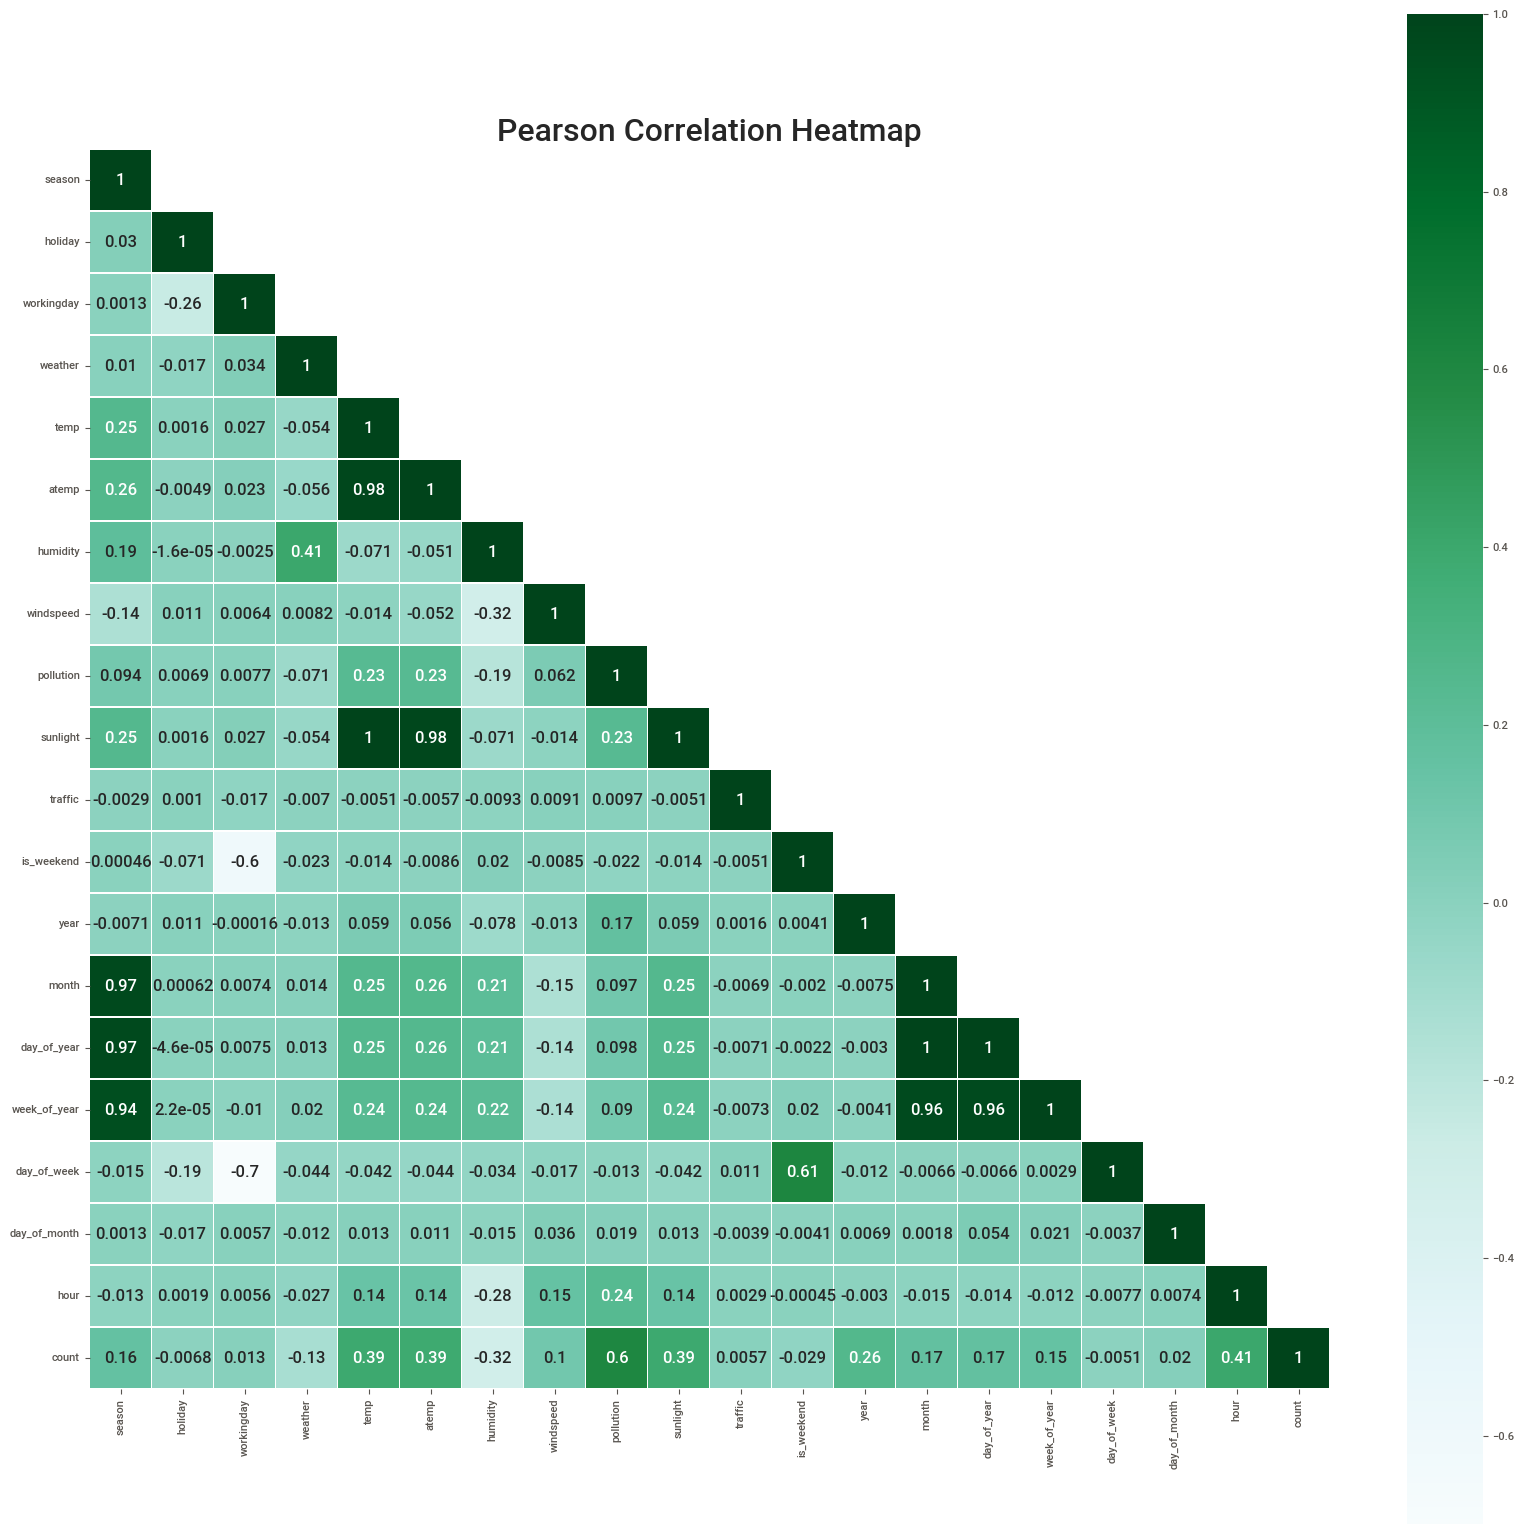

In [83]:
def corr(df: pd.DataFrame, size=(20,20)):
    correlations = df.corr()
    mask = np.zeros_like(correlations, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True

    fig, ax = plt.subplots(figsize=size)
    plt.title('Pearson Correlation Heatmap', fontsize=23)

    sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
                linecolor='w', annot=True, mask=mask)

corr(train)

## Correlations:
### What can we see from the heatmap?

#### correlations with the label `count`
*   Highly positively correlated with pollution, sunlight, atemp, hour, and temp (all 0.39+)
*   Highly negatively correlated with humidity
* Almost no correlation at all with traffic, holiday, and day of month

#### correlations between features
temp, atemp and sunlight are heavily corellated.



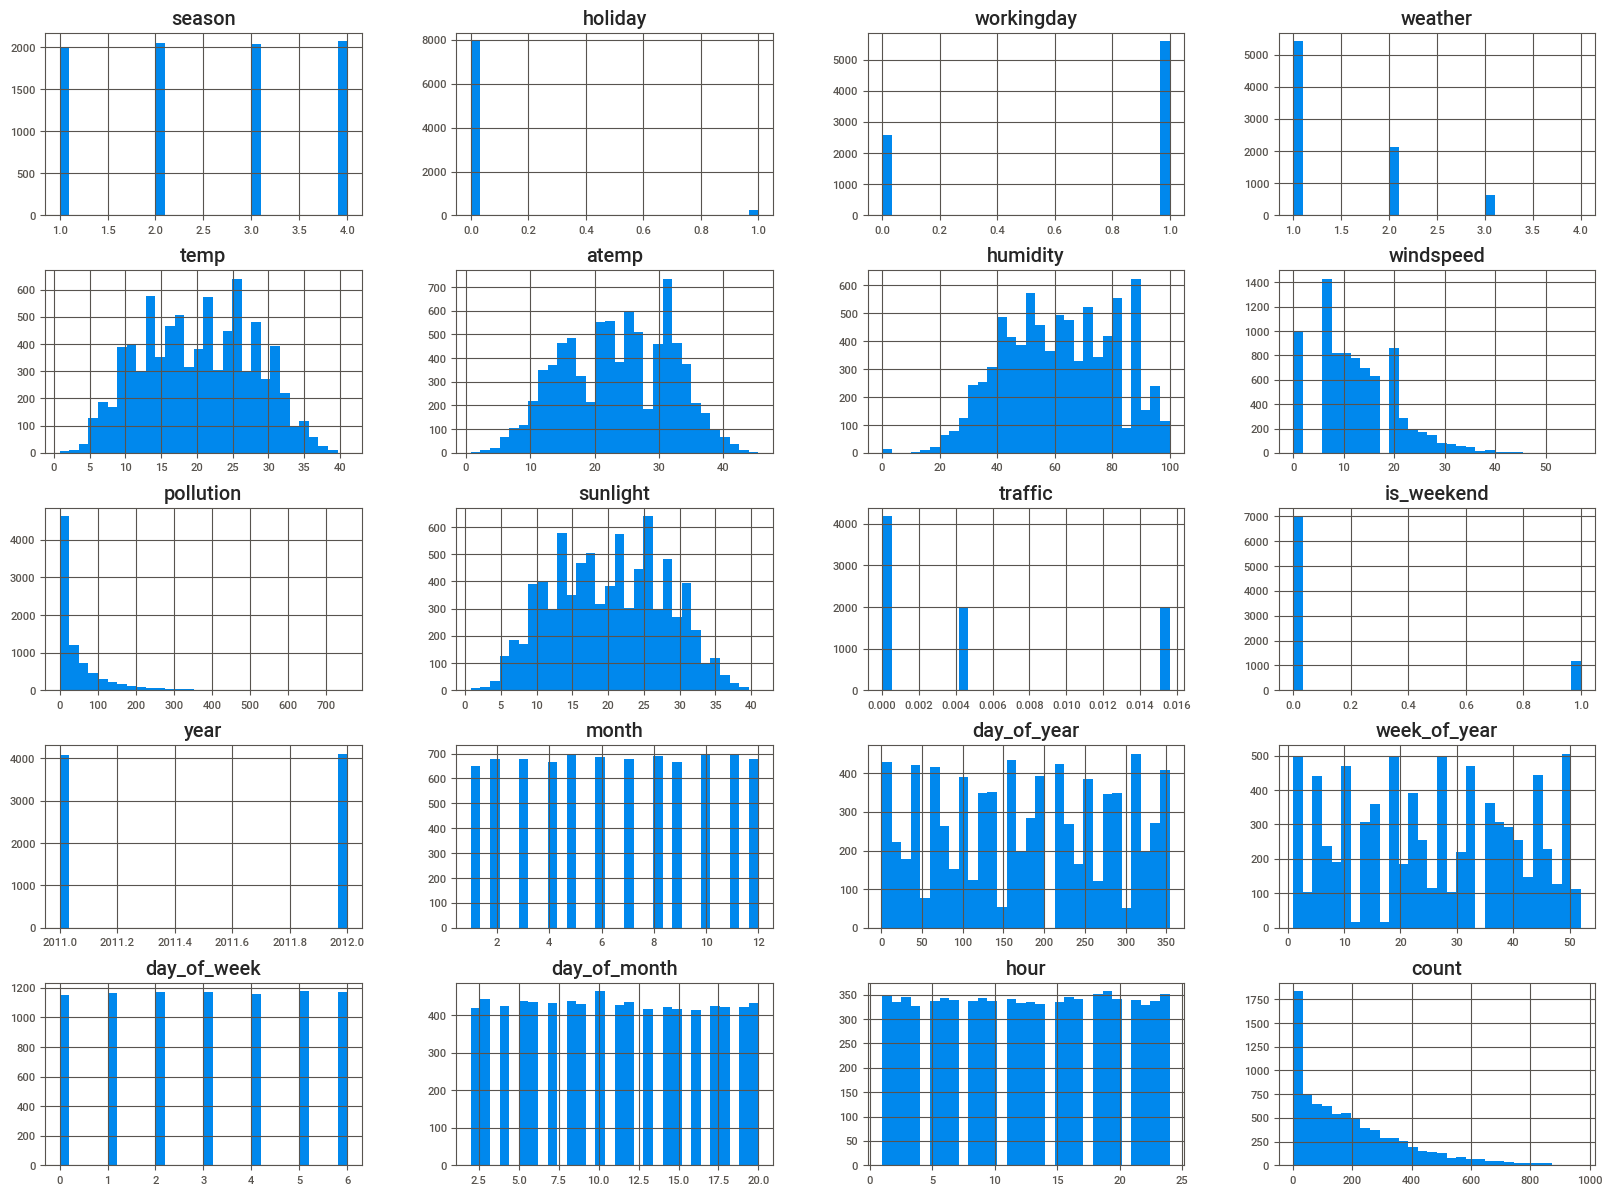

In [84]:
train.hist(bins=30, figsize=(20, 15))
pass

## Histogram conclutions:
1. uniformly distributed features: `seasons`, `day of week`, `hour`, `day of month`, `month`  
2. `working day` & `weekend` distrubutes as expected (around 2\7 of records are weekend and 5/7 are working days)  
3. `temp`, `atemp` and `sunlight` are similar to gaussian distribution
4. `count` and `pollution` deacrsing, we will investigate it futther  
    

## Plots:

### Temp atemp correlation
high correlation between temp, atemp and sunglight, it might help to remove temp and sunlignt,  
or create a "nice day" feature that will combine them. we will investigate this in the model stage.

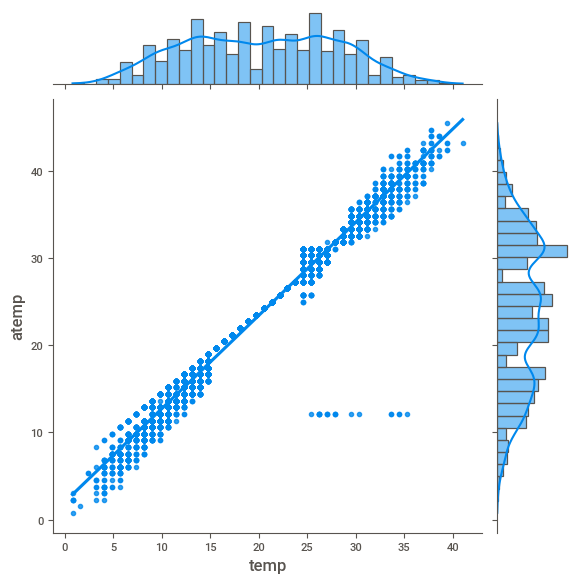

In [85]:
sns.jointplot(x=train['temp'], 
              y=train['atemp'], 
              data=train, 
              kind="reg")
plt.show()

### Temp sunlight correlation

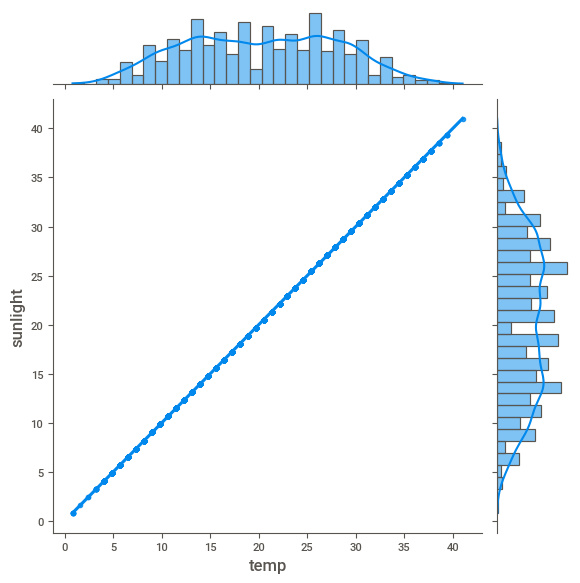

In [86]:
sns.jointplot(x=train['temp'], 
              y=train['sunlight'], 
              data=train, 
              kind="reg")
plt.show()

### Timeseries View:

### Sorting by datetime:

In [87]:
train.sort_index()

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
...                     ...      ...         ...      ...    ...     ...   
2012-12-19 16:00:00       4        0           1        1  17.22  21.210   
2012-12-19 18:00:00       4        0           1        1  15.58  19.695   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   

                     humidity  windspeed   pollution  sunlight   traffic  \
datetime                                                                   
2011-01-01 01:00:00        80     0.0000   10.820673     9.021  0.000000   
2011-01-01 02:00:00        80     0.0000   19.189498     9.021  0.004489   
2011-01-01 04:00:00        75     0.0000    0.133472     9.841  0.015615   
2011-01-01 05:00:00        75     6.0032    0.014335     9.841  0.000000   
2011-01-01 06:00:00        80     0.0000    0.096936     9.021  0.004489   
...                       ...        ...         ...       ...       ...   
2012-12-19 16:00:00        50    23.9994   19.956957    17.221  0.015615   
2012-12-19 18:00:00        50    23.9994  212.578827    15.581  0.004489   
2012-12-19 19:00:00        50    26.0027   21.027171    15.581  0.015615   
2012-12-19 20:00:00        57    15.0013   37.737255    14.761  0.004489   
2012-12-19 21:00:00        61    15.0013   49.855590    13.941  0.000000   

                     is_weekend  year  month  day_of_year  week_of_year  \
datetime                                                                  
2011-01-01 01:00:00           0  2011      1            1            52   
2011-01-01 02:00:00           0  2011      1            1            52   
2011-01-01 04:00:00           0  2011      1            1            52   
2011-01-01 05:00:00           0  2011      1            1            52   
2011-01-01 06:00:00           0  2011      1            1            52   
...                         ...   ...    ...          ...           ...   
2012-12-19 16:00:00           0  2012     12          354            51   
2012-12-19 18:00:00           0  2012     12          354            51   
2012-12-19 19:00:00           0  2012     12          354            51   
2012-12-19 20:00:00           0  2012     12          354            51   
2012-12-19 21:00:00           0  2012     12          354            51   

                     day_of_week  day_of_month  hour  count  
datetime                                                     
2011-01-01 01:00:00            5             2     2     40  
2011-01-01 02:00:00            5             2     3     32  
2011-01-01 04:00:00            5             2     5      1  
2011-01-01 05:00:00            5             2     6      1  
2011-01-01 06:00:00            5             2     7      2  
...                          ...           ...   ...    ...  
2012-12-19 16:00:00            2            20    17    334  
2012-12-19 18:00:00            2            20    19    569  
2012-12-19 19:00:00            2            20    20    336  
2012-12-19 20:00:00            2            20    21    241  
2012-12-19 21:00:00            2            20    22    168  

[8164 rows x 20 columns]

### Ido games:

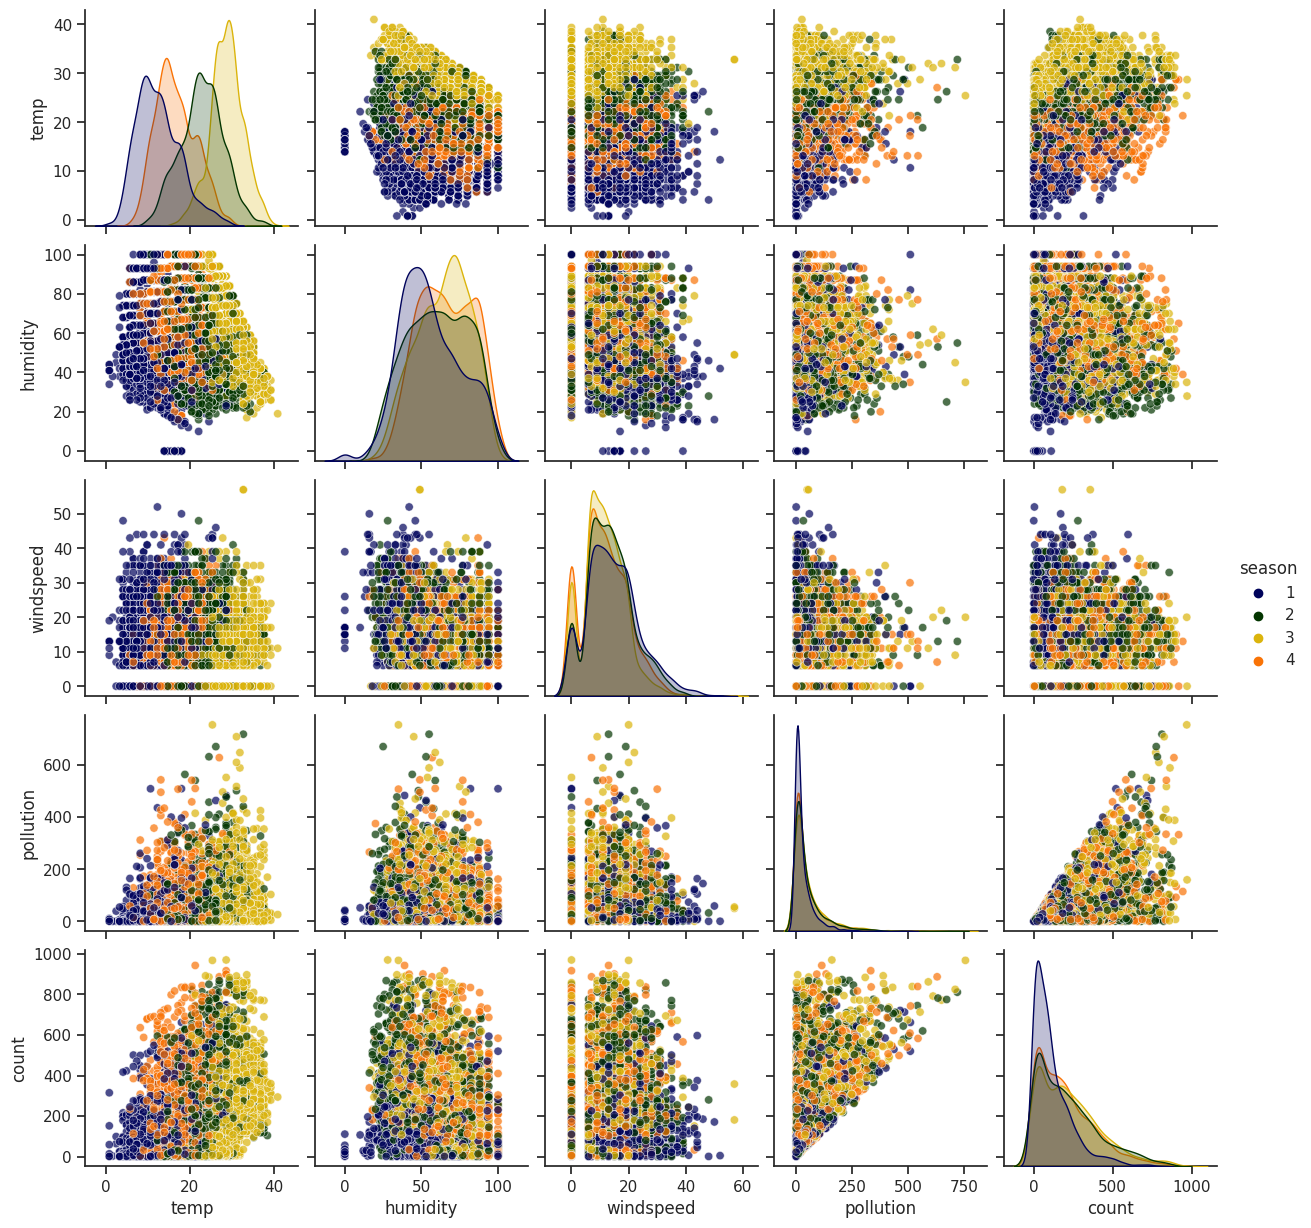

In [88]:
# Will only use six variables for plotting pairs
reduced_features = train[['temp', 'humidity', 'windspeed', 'pollution', 'count', 'season']]
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(fill=True))
pass

### count over time:
Generally we can see rent count going up over the years

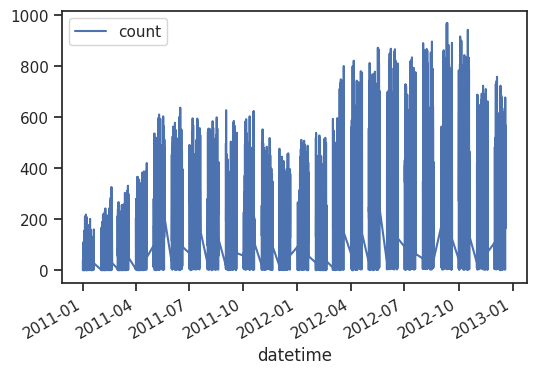

In [89]:
train.plot(y="count")
pass

### count over time - with seasons:
when looking periodicly, we can see that there are trends. it seems for example that summer has more demand then winter. 
next we will dig deeper on that

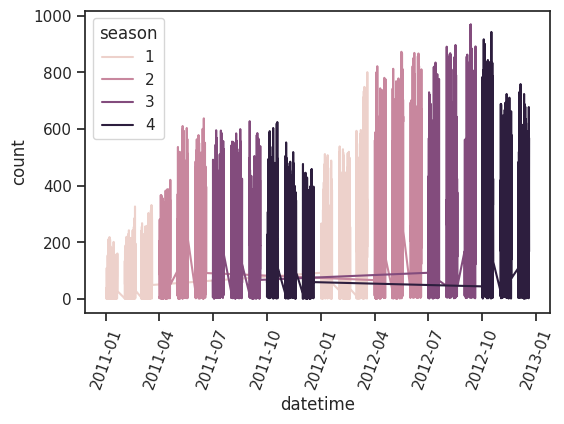

In [90]:
sns.lineplot(data=train, x=train.index, y="count", hue= "season")
plt.xticks(rotation=70)
pass

## diffrent periods
here we couldnt find intersting pattern within a month,  
but whithn a day - seems promising. we will investigate this further down the line

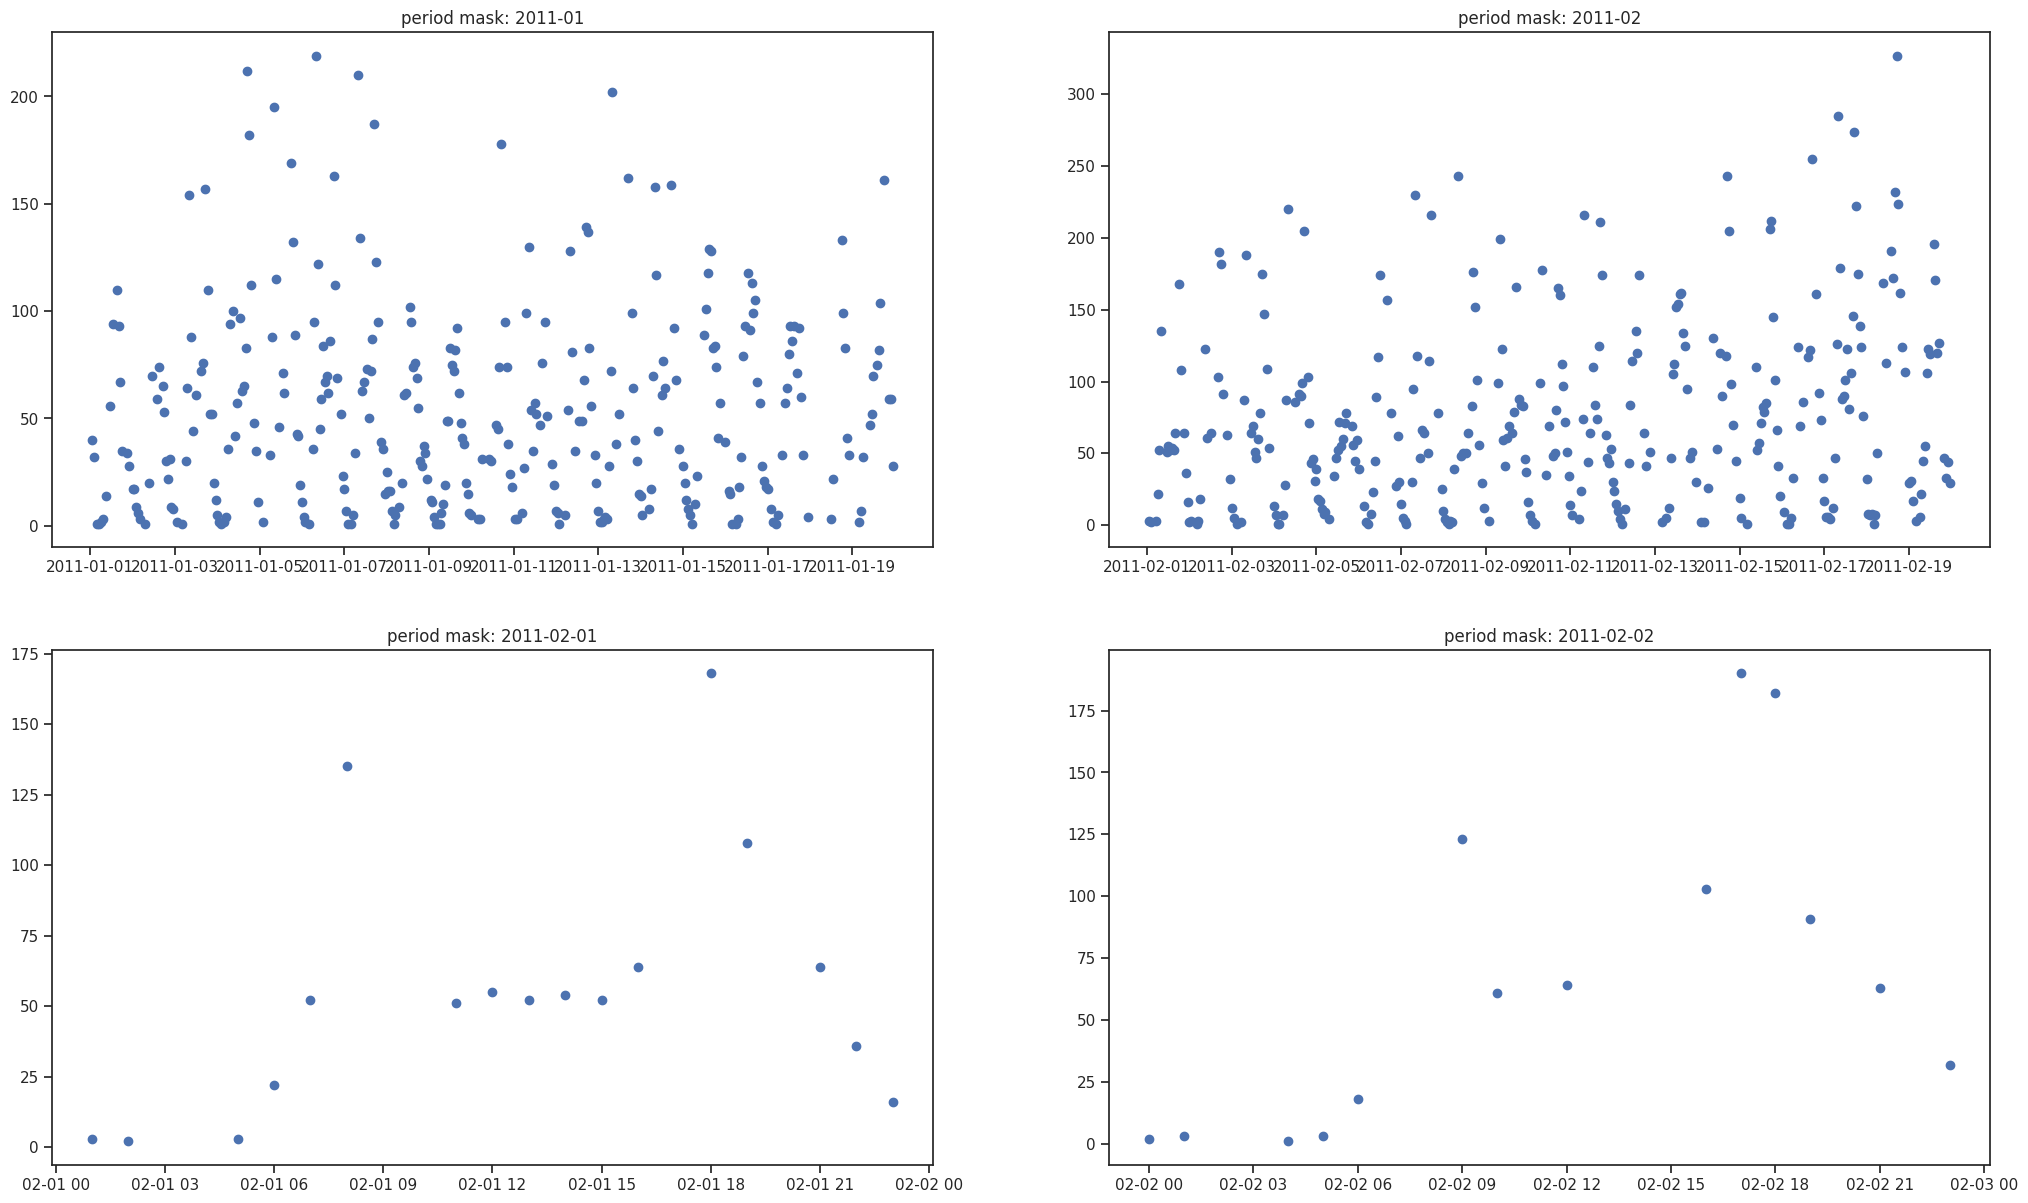

In [91]:
fig, axes = plt.subplots(2,2, squeeze=True)
fig.set_figwidth(25)
fig.set_figheight(15)
for axe, period in zip(axes.flat, ['2011-01', '2011-02', '2011-02-01', '2011-02-02']):
    df = train.loc[period]
    axe.scatter(df.index, df['count'])
    axe.set_title('period mask: '+period)



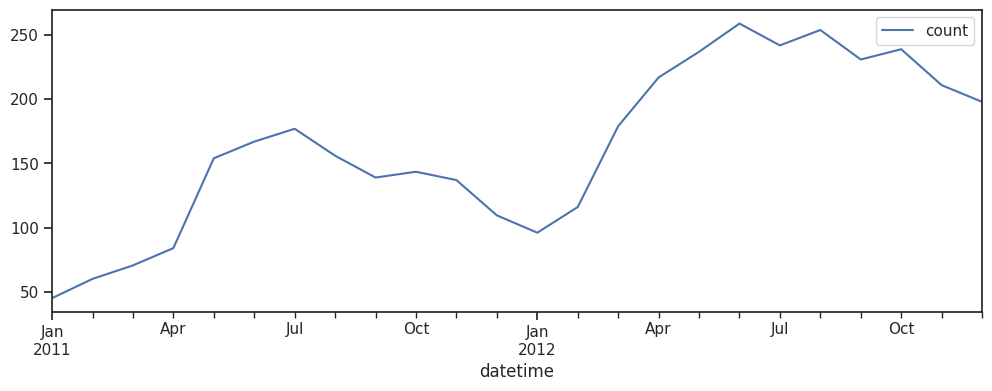

In [92]:
#@title monthly resample view
train[["count"]].resample("1m").median().plot(figsize=(12,4))
pass

### Hour view (Very interesting):
here we can see that there is clear "rush hour" phenomenon. there are hour ranges with clear spikes.
This seems to be the general demand to transportaion in **working hourse**.
lets try to confirm this

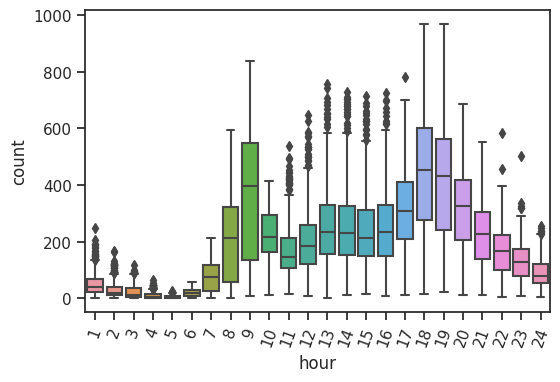

In [93]:
sns.boxplot(data=train, x="hour", y="count")
plt.xticks(rotation=70)
pass

### traffic, pollution and count (very strong connection)
when viewing hourly, the connection between `pollution` and `count` is very strong!  
connection to traffic is unclear, but this might be due to `traffic` values being unclear

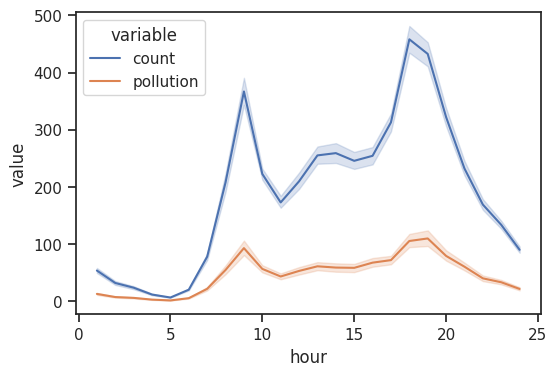

In [94]:
df = train.loc[:,('count', 'hour', 'pollution')]

sns.lineplot(x='hour', y='value', hue='variable', 
             data=pd.melt(df, ['hour']))


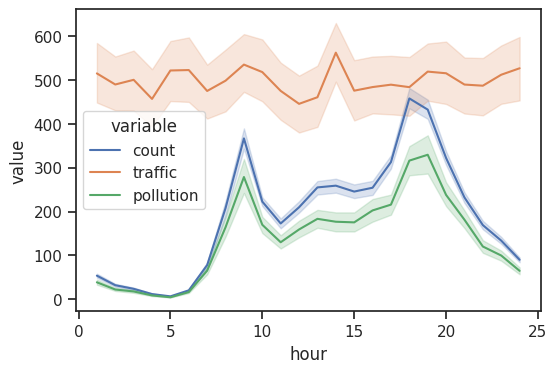

In [95]:
df = train.loc[:,('count', 'traffic', 'hour', 'pollution')]
df['traffic'] = [t*100000 for t in df.traffic] # scaling
df['pollution'] = [t*3 for t in df.pollution] # scaling

sns.lineplot(x='hour', y='value', hue='variable', 
             data=pd.melt(df, ['hour']))


### Yearly view:

clearly summber is very strong

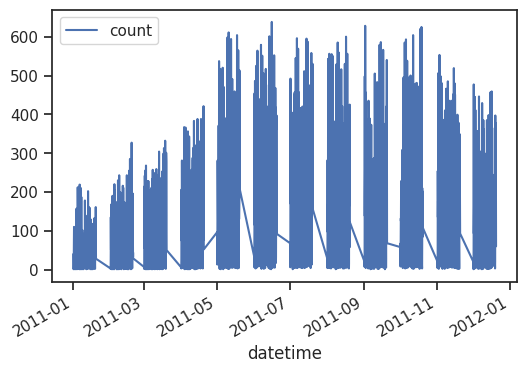

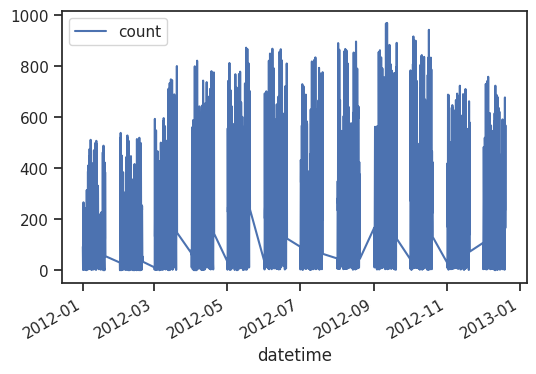

In [96]:
for year in ["2011", "2012"]:
  train.loc[year].plot(y="count")

### Month/Season view:

Here we can see, although it's obvious enough - that at the midst of winter demand is lower

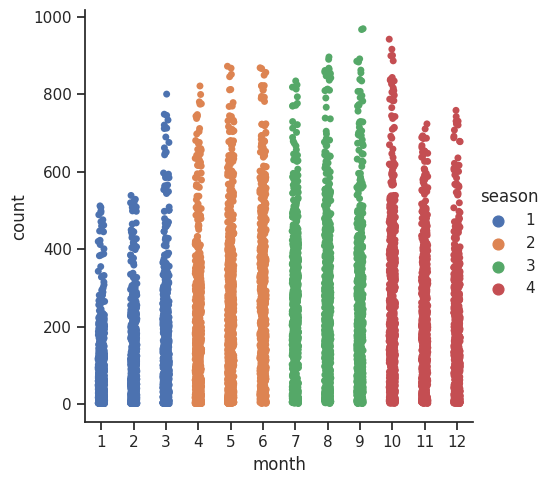

In [97]:
sns.catplot(data=train, x="month", y="count", hue= "season")
pass

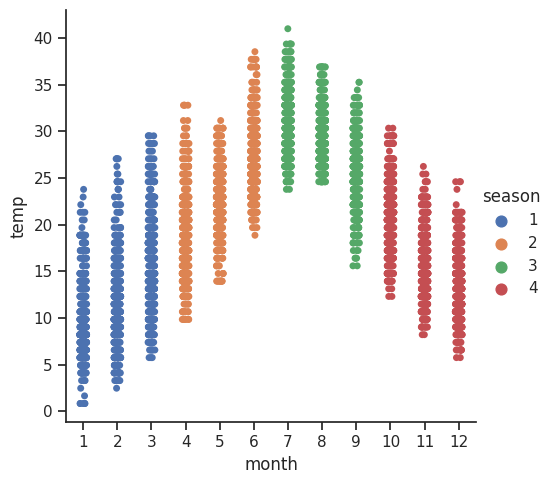

In [98]:
sns.catplot(data=train, x="month", y="temp", hue= "season")

### Weekly view:
seems pretty uniform, on saturday there are less rents 

In [99]:
sns.catplot(data=train, x=[get_day_name(day) for day in train.day_of_week], y="count", aspect=1.8)
pass

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


ValueError: ignored

<Figure size 900x500 with 1 Axes>

when summing up total rent of each days, we can see higher counts at the end of the working week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


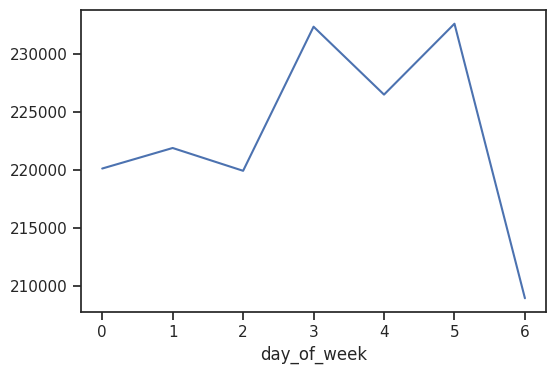

In [100]:
p = train.groupby('day_of_week')['count'].sum().plot()
mapper, mapped = range(7), [get_day_name(d) for d in range(7)]
p.set_xticks(mapper, mapped)
pass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


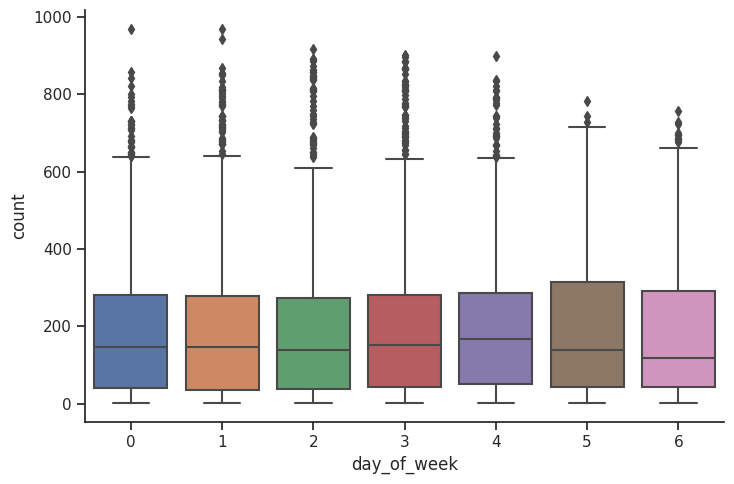

In [101]:
g = sns.catplot(data=train, x="day_of_week", y="count", kind = "box", aspect=1.5)
g.axes.flat[0].set_xticks(mapper, mapped)
pass

### Week of year view:

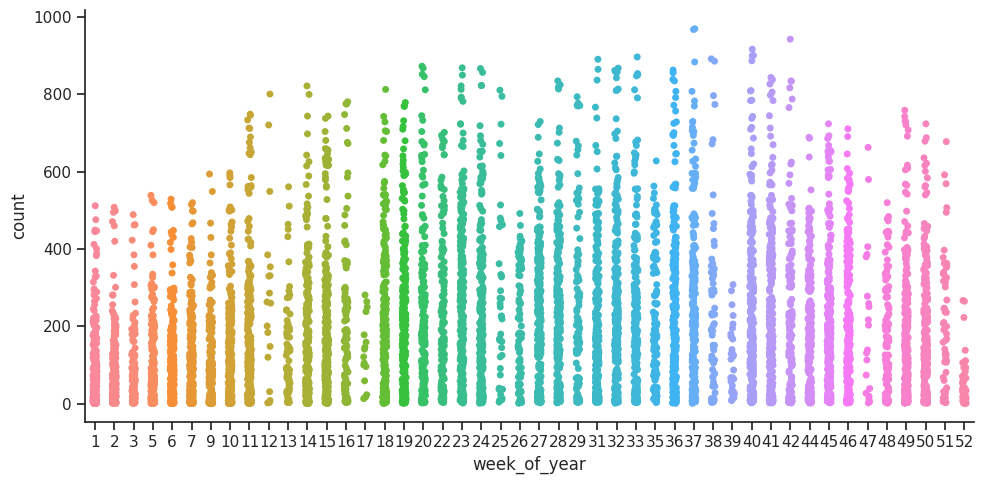

In [102]:
plt = sns.catplot(data=train, x="week_of_year", y="count", aspect=2)


### Seasonal trend:

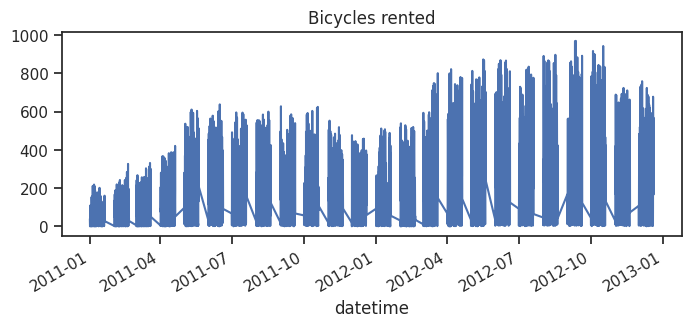

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

y = train['count']
y.name = "n_bicycles"

y.plot(title="Bicycles rented", figsize=(8, 3));

### Holiday, working day:

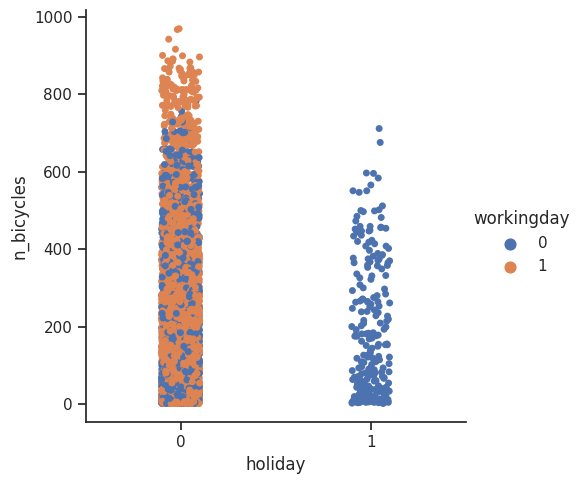

In [104]:
sns.catplot(data=train, x="holiday", y="count", hue= "workingday")

### Weekend, working day:

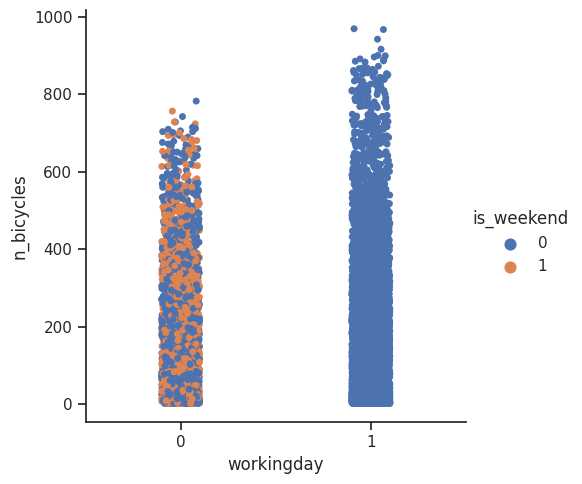

In [105]:
sns.catplot(data=train, x="workingday", y="count", hue= "is_weekend")

### Pollution:

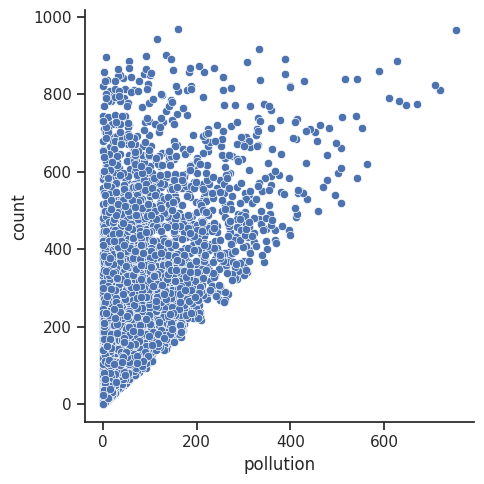

In [106]:
sns.relplot(data=train, x="pollution", y="count")

### compare count and pollution

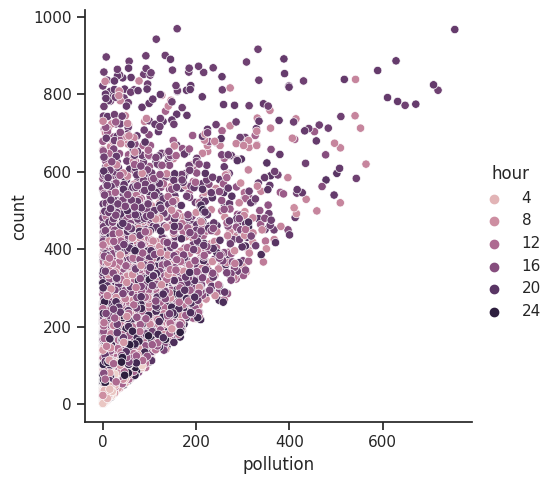

In [107]:
sns.relplot(
    data=train,
    x="pollution", y="count",
    hue="hour",
)

### weather


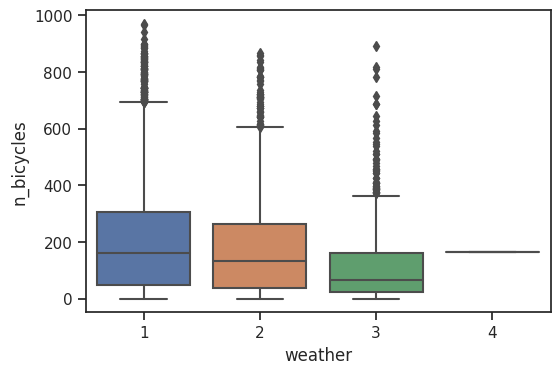

In [108]:
sns.boxplot(data=train, x="weather", y="count")

we can notice that weather variable contains a very strong feature with in it. if its really bad(4), it is almost gaurenty that no bikes will be rented.

### temp

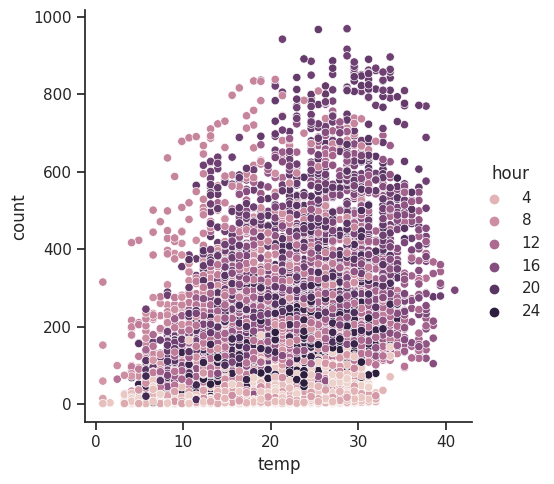

In [109]:
sns.relplot(data=train, x="temp" ,y="count", hue ="hour")

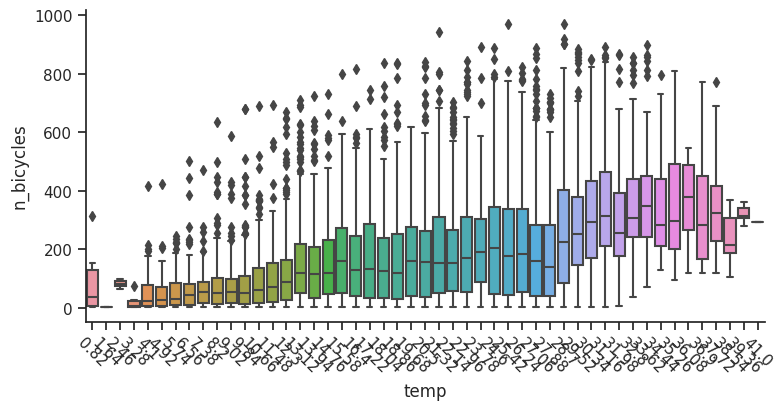

In [110]:
sns.catplot(data=train, x="temp", y="count", kind = "box", height=4, aspect =2).set_xticklabels(rotation=-45)

### atemp

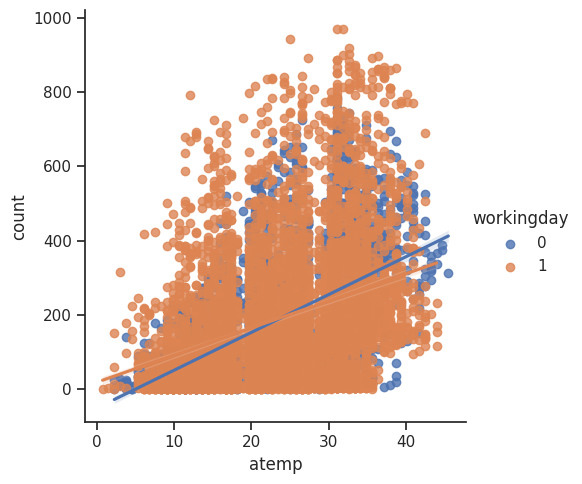

In [111]:
sns.lmplot(data=train, x="atemp" ,y="count", hue = "workingday")

### windspeed

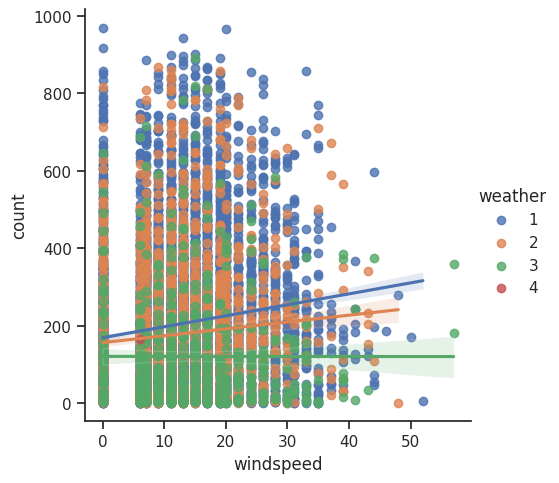

In [112]:
sns.lmplot(data=train, x="windspeed", y="count", hue="weather")

note- the better the weather, a bit of wind can have good corellation to the num of bikes. when the weather is bad- theres no such correlation.

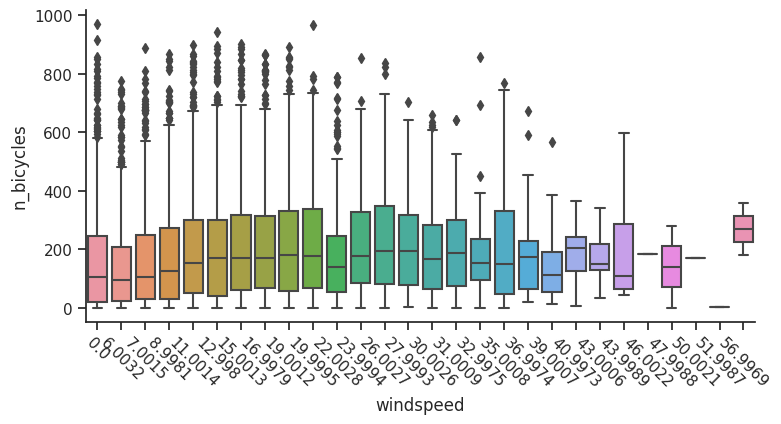

In [113]:
sns.catplot(data=train, x="windspeed", y="count", kind = "box", height=4, aspect = 2).set_xticklabels(rotation=-45)

### traffic

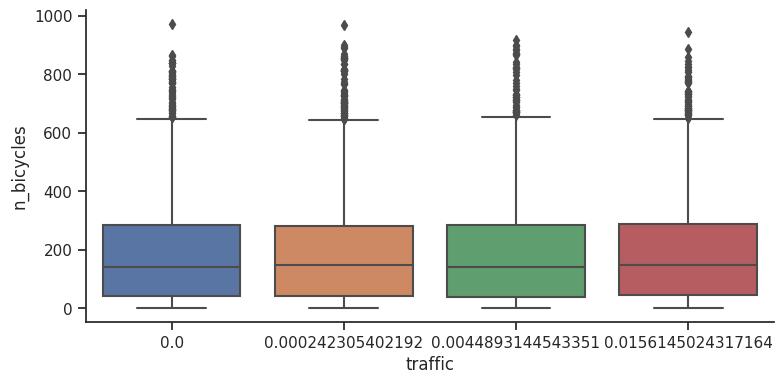

In [114]:
sns.catplot(data=train, x="traffic", y="count", kind = "box", height=4, aspect = 2)

### humidity

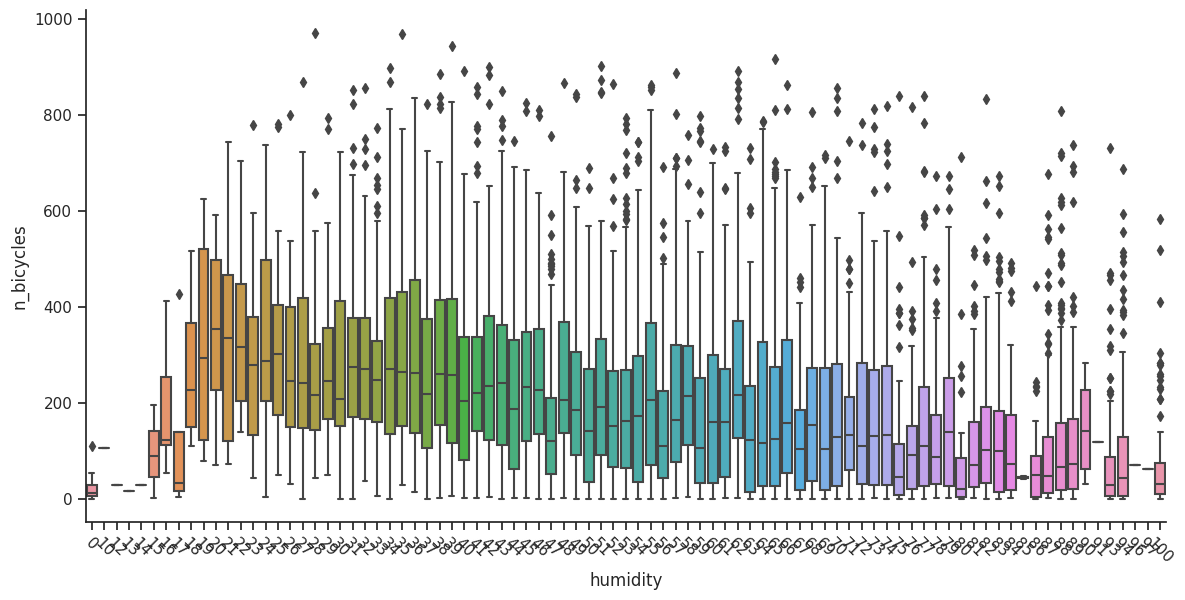

In [115]:
sns.catplot(data=train, x="humidity", y="count", kind = "box", height=6, aspect = 2).set_xticklabels(rotation=-45)

### Sweetviz analysis:

In [116]:
!pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
import sweetviz

my_report = sweetviz.compare([train, "Train"], [test, "Test"], "count")

                                             |          | [  0%]   00:00 -> (? left)

In [118]:
my_report.show_html("Report.html")

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Part 2: Model Training & hyperparameters tuning:

## Creating Datasets for models:

In [119]:
x_train = train.drop(['count'], axis=1)
y_train = train[['count']]
print(x_train.columns)
y_train

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'pollution', 'sunlight', 'traffic',
       'is_weekend', 'year', 'month', 'day_of_year', 'week_of_year',
       'day_of_week', 'day_of_month', 'hour'],
      dtype='object')


count
datetime                  
2011-07-11 00:00:00     35
2012-05-18 22:00:00    251
2011-04-01 23:00:00     53
2012-09-16 09:00:00    296
2011-02-01 23:00:00     16
...                    ...
2012-01-14 02:00:00     38
2011-12-10 09:00:00    149
2011-12-18 16:00:00    234
2011-02-19 07:00:00     22
2012-05-02 07:00:00    358

[8164 rows x 1 columns]

In [120]:
x_test = test.drop(['count'], axis=1)
y_test = test[['count']]
print(x_test.columns)

y_test

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'pollution', 'sunlight', 'traffic',
       'is_weekend', 'year', 'month', 'day_of_year', 'week_of_year',
       'day_of_week', 'day_of_month', 'hour'],
      dtype='object')


count
datetime                  
2011-07-19 11:00:00    127
2012-01-16 06:00:00     13
2011-12-11 18:00:00    163
2012-08-15 10:00:00    233
2012-06-15 23:00:00    222
...                    ...
2011-03-19 15:00:00    313
2012-01-08 16:00:00    314
2011-07-11 05:00:00     26
2011-07-16 08:00:00    127
2011-01-01 12:00:00     84

[2722 rows x 1 columns]

## Models train & run setup

In [121]:
CHOSEN_MODELS = ['Random forest', 'XGboost', 'Adaboost']

# Model testing:
models = {name: None for name in CHOSEN_MODELS}
       

In [122]:
from datetime import datetime as dt
# helper decorator to record runtimes
time_records = {}
def measure_time(name):

    def decorator_maker(func, name=name):
        key_name = name if name else func.__name__
        def decorator(*args, **kwargs):
            start = dt.now()
            result = func(*args, **kwargs)
            time_records[key_name] = (dt.now() - start).seconds
            return result
        return decorator
    return decorator_maker



### Random Forest:

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### Explanation for Random Forest hyper parameter tuning:

In order to understand the meaning of the hyperparameter tuning we used, we read [this article](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/). We used [this article](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d) and [this documentation](https://scikit-learn.org/stable/modules/ensemble.html#parameters) to tune them according to recommended values. 

Main conclusions from the articles:<br>
1) n_estimators: "fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go.fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go."<br>
2) max_features: "fine tuning the number of features to consider when splitting at each node is fundamental, therefore it should be considered when using a search approach to find the best hyperparameters for our forest." "Empirical good default values are max_features=1.0 or equivalently max_features=None (always considering all features instead of a random subset) for regression problems,.."<br>
3) max_depth, min_samples: "Good results are often achieved when setting max_depth=None in combination with min_samples_split=2"

In [124]:
tirgul_params_rf = {'max_features': ['auto', 'sqrt', 'log2', None, 1/3, 1, 2, 3], 'n_estimators' : [300], 'max_depth' : [1, None], 'min_samples_split': [2]}
best_params_rf = {'max_depth': [None],
 'max_features': ['auto'],
 'min_samples_split': [2],
 'n_estimators': [300]}

#### Running Random Forest:

In [125]:
@measure_time('Random forest')
def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(n_estimators=200, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid=best_params_rf,
                          scoring='neg_mean_squared_error',
                          cv=5, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

### Adaboost:

In [126]:
from sklearn.ensemble import AdaBoostRegressor

#### Explanation for Adaboost hyper parameter tuning:
We used [this articles recommendation](https://techfor-today.com/hyperparameter-tuning-of-adaboost/) to gridsearch the best parameters

In [127]:
tirgul_params_abr = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.0001, 0.01, 0.1, 1, 1.1, 1.2],
}
best_params_abr = {'n_estimators': [200],'learning_rate' : [0.1], }

#### Running Adaboost:

In [128]:
@measure_time('Adaboost')
def run_adaboost(x_train, y_train):
  abr = AdaBoostRegressor()
  tuned_abr = GridSearchCV(estimator=abr, 
                          param_grid=best_params_abr,
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_abr.fit(x_train, np.ravel(y_train))
  return tuned_abr

### XGboost:

In [129]:
from xgboost import XGBRegressor

#### Explanation for XGboost hyper parameter tuning:
Firstly, we have decided to use the default gbtree booster. That's because "Tree-based models allow to represent all types of non-linear data well, since no formula is needed which describes the relation between target and input variables" (https://www.avato-consulting.com/?p=28903&lang=en). we have no reason to assume that the data has a closed formula which describes its behaviour.

Presciding with the gbtree, we continued tuning this booster specific hyper parameters. 

We have based on the article from https://blog.dataiku.com/narrowing-the-search-which-hyperparameters-really-matter#:~:text=Important%20Hyperparameters%20for%20XGBoost&text=For%20learning%20rate%2C%20higher%20values,increased%20density%20at%20lower%20values.

They had some informative insights about which hyper parameters are the most relevant(learning rate, subsample and min child weight, and also max_depth and colsample) and also about the value range on which each parameter tuning should be.

Afterwords, we used GridsearchCV to tune those paraneters to our specific model.

In [130]:
tirgul_params_xgb = {"learning_rate": [0.2],
                          "min_child_weight": [9,10,11],
                          'max_depth': [8],
                          "colsample_bytree":[0.5, 0.6],
                     "subsample":[0.9, 1]
                     }

best_grid_xgb = {'colsample_bytree': [0.6],
 'learning_rate': [0.2],
 'max_depth': [8],
 'min_child_weight': [10],
 'subsample': [0.9]}

#### Running XGboost:

In [131]:
@measure_time('XGboost')
def run_XGboost_regression(x, y):
  xgb = XGBRegressor()
  tuned_xgb = GridSearchCV(estimator=xgb, 
                          param_grid=best_grid_xgb,
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_xgb.fit(x, np.ravel(y))
  return tuned_xgb

### Running all models:

In [132]:
def run_all_models(x, y):    
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x, y)
  models_dict['XGboost'] = run_XGboost_regression(x, y)
  models_dict['Adaboost'] = run_adaboost(x, y)
  return models_dict

# Part 3: Models initail run

In [133]:
models = run_all_models(x_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-2571.729 total time=  20.3s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-2766.500 total time=  20.4s
[CV 3/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-3084.788 total time=  13.5s
[CV 4/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-3067.951 total time=  13.6s
[CV 5/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-2579.684 total time=  14.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[15:08:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=8, min_child_weight=10, subsample=0.9;, score=-2066.495 total time=   0.9s
[

In [134]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['XGboost'] = models['XGboost'].best_score_
cv_scores['Adaboost'] = models['Adaboost'].best_score_
cv_scores

{'Random forest': -2814.130400314695,
 'XGboost': -2045.382033494454,
 'Adaboost': -11141.197947282519}

In [135]:
for k, v in cv_scores.items():
  cv_scores[k] = np.sqrt(-cv_scores[k])
cv_scores

{'Random forest': 53.04837792350201,
 'XGboost': 45.22590002967828,
 'Adaboost': 105.55187325330857}

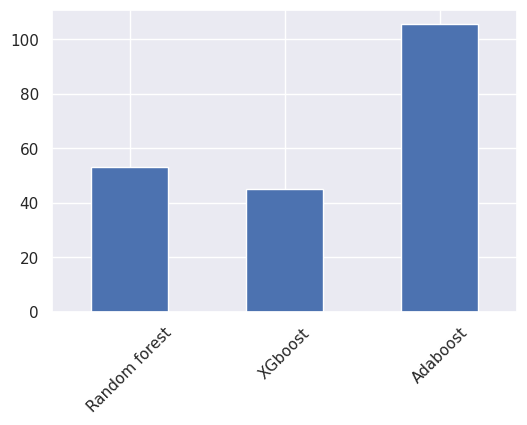

In [136]:
sns.set()
cv_scores_train = pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_train.plot.bar(rot=45, legend=False)

In [137]:
models['Random forest'].best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

In [138]:
models['XGboost'].best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 10,
 'subsample': 0.9}

In [139]:
models['Adaboost'].best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [140]:
## This returns RMSE!!
from sklearn.metrics import mean_squared_error

@measure_time('eval')
def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return np.sqrt(mean_squared_error(y, y_pred))

In [141]:
evaluate_single_model(x_test, y_test, models['Random forest'].best_estimator_)

46.49161007392515

In [142]:
trained_models_dict = {m : models[m].best_estimator_ for m in CHOSEN_MODELS}

In [143]:
def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
    time_records[f'{k}_evaluation'] = time_records['eval']
  return test_set_scores

In [144]:
x_test.week_of_year =  x_test.week_of_year.astype('int')

In [145]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2722 entries, 2011-07-19 11:00:00 to 2011-01-01 12:00:00
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        2722 non-null   int64  
 1   holiday       2722 non-null   int64  
 2   workingday    2722 non-null   int64  
 3   weather       2722 non-null   int64  
 4   temp          2722 non-null   float64
 5   atemp         2722 non-null   float64
 6   humidity      2722 non-null   int64  
 7   windspeed     2722 non-null   float64
 8   pollution     2722 non-null   float64
 9   sunlight      2722 non-null   float64
 10  traffic       2722 non-null   float64
 11  is_weekend    2722 non-null   int64  
 12  year          2722 non-null   int64  
 13  month         2722 non-null   int64  
 14  day_of_year   2722 non-null   int64  
 15  week_of_year  2722 non-null   int64  
 16  day_of_week   2722 non-null   int64  
 17  day_of_month  2722 non-null   int64

In [146]:
test_set_scores = evaluate_all_models(x_test, y_test, trained_models_dict)
test_set_scores

{'Random forest': 46.49161007392515,
 'XGboost': 39.13900123783714,
 'Adaboost': 105.31351012788004}

In [147]:

combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [53.04837792350201, 46.49161007392515],
 'XGboost': [45.22590002967828, 39.13900123783714],
 'Adaboost': [105.55187325330857, 105.31351012788004]}

## First model scores:

In [148]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

CV score  Test set score
Random forest   53.048378       46.491610
XGboost         45.225900       39.139001
Adaboost       105.551873      105.313510

## First run Feature importance:

In [149]:
feature_importance_dict = {}

In [150]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [151]:
for m in CHOSEN_MODELS:
    feature_importance_dict[m] = find_tree_feature_importance(
        trained_models_dict[m], x_train.columns)

In [152]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

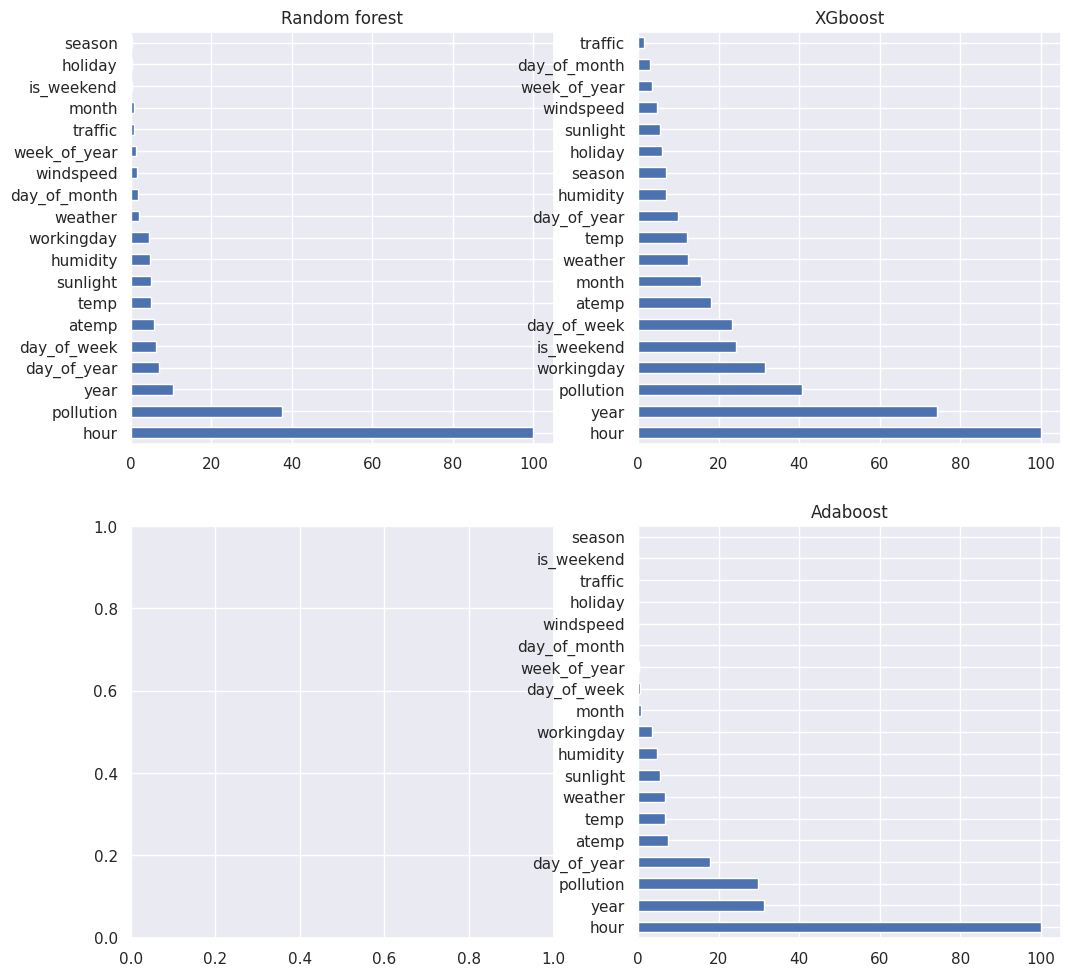

In [153]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['XGboost'].plot(kind='barh', ax=axes[0, 1], legend=False, title='XGboost')
feature_importance_dict['Adaboost'].plot(kind='barh', ax=axes[1, 1], legend=False, title='Adaboost')

# Part 4: Explainability
we can see that the most valuable features are hour, year and pollution in all of the free models. it is quit interesting to see that two of those highly informative features are ones we extracted from the original timestamp. 




we can explain the year variable importance quit easily- it is obvious from the EDA that there has been a sagnificent rise in the average renting rate in 2012 in relation to 2011. in those same graphs of the EDA, it is also quit notable that there is seasonality inbetween each year's month- but it seems less sagnificant for the models(even though these features are important too).

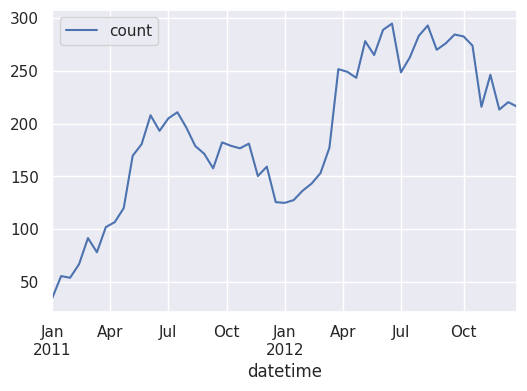

In [154]:
train[["count"]].resample("2w").mean().plot()


we can statisticly explain polution variable importance by the fact that it is highly correlated with the label.


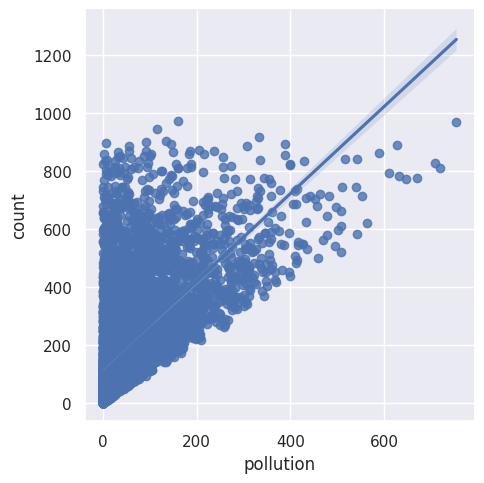

In [155]:
sns.lmplot(data=train, x="pollution" ,y="count")

the most sagnificent feature, for all of the models, was hour. the plot beneath(which also apeers in the EDA) visualize it in such matter that we can easily think of several "common sense" explanation for this.
during the miiddle of the night, the shops are probably closed and people are asleep, so theres barley to no rentals, during buisness hours, theres a natural cycle of trafic. the early morning is rapidly decreasing, until a first peak is at 9. then theres a mallow decrease, and than another pick is arising at noon- with it's pick hour)and over all pick) at 18. after words, three's a study decrease over the evening.
this patterns seems perfectly reasnable for traffic at a bike rental shop, for buisness hours and customer preferences justifications.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

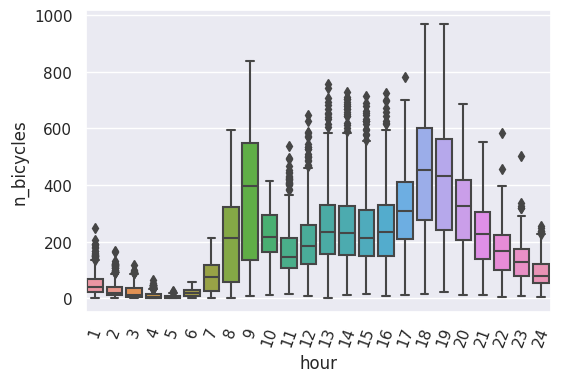

In [156]:
sns.boxplot(data=train, x="hour", y="count")
plt.xticks(rotation=70)

# Part 5: second run after feature selection

## Feature Selection:

In [157]:
weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-3:])
weak_features_dict

{'Random forest': ['is_weekend', 'holiday', 'season'],
 'XGboost': ['week_of_year', 'day_of_month', 'traffic'],
 'Adaboost': ['traffic', 'is_weekend', 'season']}

In [158]:
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = {'train' : x_train.drop(v, axis=1), 'test': x_test.drop(v, axis=1)}

## Running models after feature selection:

In [159]:
def run_all_models(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest']['train'], y)
  models_dict['XGboost'] = run_XGboost_regression(x_dict['XGboost']['train'], y)
  models_dict['Adaboost'] = run_adaboost(x_dict['Adaboost']['train'], y)
  return models_dict

In [160]:
x_data_dict.keys()

dict_keys(['Random forest', 'XGboost', 'Adaboost'])

In [161]:
models = run_all_models(x_data_dict, y_train.values.ravel())
models

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-2574.554 total time=  13.2s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-2770.685 total time=  13.0s
[CV 3/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-3089.617 total time=  13.2s
[CV 4/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-3077.989 total time=  13.7s
[CV 5/5] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300;, score=-2560.148 total time=  13.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[15:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=8, min_child_weight=10, subsample=0.9;, score=-2051.130 total time=   0.8s
[

{'Random forest': GridSearchCV(cv=5,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_depth': [None], 'max_features': ['auto'],
                          'min_samples_split': [2], 'n_estimators': [300]},
              scoring='neg_mean_squared_error', verbose=3),
 'XGboost': GridSearchCV(cv=3, estimator=XGBRegressor(),
              param_grid={'colsample_bytree': [0.6], 'learning_rate': [0.2],
                          'max_depth': [8], 'min_child_weight': [10],
                          'subsample': [0.9]},
              scoring='neg_mean_squared_error', verbose=3),
 'Adaboost': GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
              param_grid={'learning_rate': [0.1], 'n_estimators': [200]},
              scoring='neg_mean_squared_error', verbose=3)}

In [162]:
cv_scores = {}
best_params = {}
for m in CHOSEN_MODELS:
    cv_scores[m] = models[m].best_score_
    best_params[m] = models[m].best_params_
    


In [163]:
for k, v in cv_scores.items():
  cv_scores[k] = np.sqrt(-cv_scores[k])
cv_scores

{'Random forest': 53.05278889336139,
 'XGboost': 45.88901217326059,
 'Adaboost': 105.01277632333888}

In [164]:
models['Random forest'].best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

In [165]:
models['Adaboost'].best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [166]:
models['XGboost'].best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 10,
 'subsample': 0.9}

In [167]:
trained_models_dict = {m: models[m].best_estimator_ for m in CHOSEN_MODELS}
trained_models_dict

{'Random forest': RandomForestRegressor(n_estimators=300, random_state=42),
 'XGboost': XGBRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=8,
              min_child_weight=10, subsample=0.9),
 'Adaboost': AdaBoostRegressor(learning_rate=0.1, n_estimators=200)}

In [168]:
def evaluate_all_models(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x_dict[k]['test'], y, v)
    time_records[f'{k}_evaluation'] = time_records['eval']
  return test_set_scores

In [169]:
test_set_scores = evaluate_all_models(x_data_dict, y_test, trained_models_dict)
test_set_scores

{'Random forest': 46.607147823735495,
 'XGboost': 38.73438113984116,
 'Adaboost': 105.43060420187726}

In [170]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict


{'Random forest': [53.05278889336139, 46.607147823735495],
 'XGboost': [45.88901217326059, 38.73438113984116],
 'Adaboost': [105.01277632333888, 105.43060420187726]}

In [171]:
new_scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df


CV score removed features  Test set score removed features
Random forest                  53.052789                        46.607148
XGboost                        45.889012                        38.734381
Adaboost                      105.012776                       105.430604

# Final Result:

In [172]:
combined_df = pd.concat([scores_df, new_scores_df], axis=1, ignore_index=False)
combined_df

CV score  Test set score  CV score removed features  \
Random forest   53.048378       46.491610                  53.052789   
XGboost         45.225900       39.139001                  45.889012   
Adaboost       105.551873      105.313510                 105.012776   

               Test set score removed features  
Random forest                        46.607148  
XGboost                              38.734381  
Adaboost                            105.430604

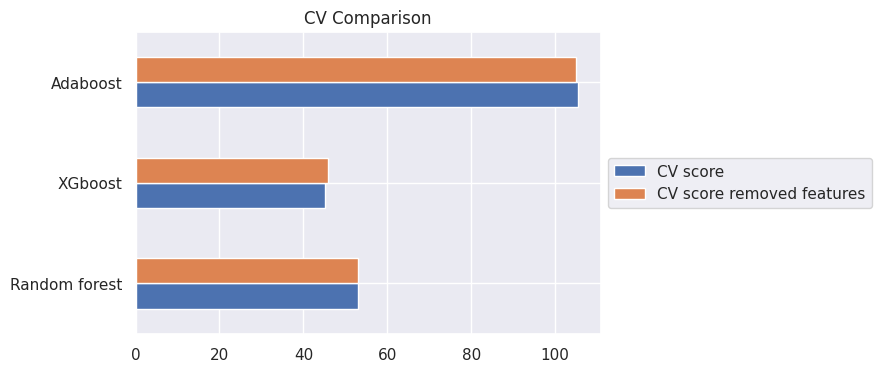

In [173]:
combined_df[['CV score', 'CV score removed features']].plot(kind='barh', title = 'CV Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


### note - adaboost poor score
The result of adaboost model is way worse than the other two. Theoriticly, Adaboost should preform simialrly to XGboost or at least as good as Random forest (after all, Adaboost is an extention of RF).
Given the above the poort result is suspicious.

We have reaserched the diffrences between ADboodt and XGboost and found that:
+ Adaboost is more sensitive to irrlevant features
+ Adaboost preform worse when highlly corrleated features are used  
For more information refer to [this article](https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f)

However, all attempts to handle these issues did not work for us.  
We tried removing "weak" features, using strong features according to XGboost `feature importance`, removing highly corrlated on and a combination of all of those.

## Results Summery:

In [174]:
time_records

{'Random forest': 82,
 'XGboost': 3,
 'Adaboost': 11,
 'eval': 0,
 'Random forest_evaluation': 0,
 'XGboost_evaluation': 0,
 'Adaboost_evaluation': 0}

In [175]:


results = {}
results['model'] = CHOSEN_MODELS
results['score (RMSE)'] = new_scores_df['Test set score removed features']
results['params used'] =  [best_params[model] for model in new_scores_df.index]
results['Features dropped'] = [set(original_columns) - set(x_data_dict[model]['test'].columns) for model in CHOSEN_MODELS]
results['New features created'] =[set(x_data_dict[model]['test'].columns) - set(original_columns)  for model in CHOSEN_MODELS]
results['Runtime trainining + inference (seconds)'] = [time_records[f'{m}_evaluation'] + time_records[m] for m in CHOSEN_MODELS]
results['Hardware used (GPU/CPU/TPU)'] = ['CPU']*3
results['Explainability (top 3 features)'] = [feature_importance_dict[model].index.values[:3] for model in CHOSEN_MODELS]


df = pd.DataFrame(results)
df

model  score (RMSE)  \
Random forest  Random forest     46.607148   
XGboost              XGboost     38.734381   
Adaboost            Adaboost    105.430604   

                                                     params used  \
Random forest  {'max_depth': None, 'max_features': 'auto', 'm...   
XGboost        {'colsample_bytree': 0.6, 'learning_rate': 0.2...   
Adaboost             {'learning_rate': 0.1, 'n_estimators': 200}   

                          Features dropped  \
Random forest  {datetime, holiday, season}   
XGboost                {traffic, datetime}   
Adaboost       {traffic, datetime, season}   

                                            New features created  \
Random forest  {day_of_week, day_of_year, hour, month, year, ...   
XGboost        {day_of_week, day_of_year, is_weekend, hour, m...   
Adaboost       {day_of_week, day_of_year, hour, month, year, ...   

               Runtime trainining + inference (seconds)  \
Random forest                                        82   
XGboost                                               3   
Adaboost                                             11   

              Hardware used (GPU/CPU/TPU) Explainability (top 3 features)  
Random forest                         CPU         [hour, pollution, year]  
XGboost                               CPU         [hour, year, pollution]  
Adaboost                              CPU         [hour, year, pollution]

### save results to file

In [176]:
import os
df.to_csv(os.path.join(os.getcwd(), 'results.csv'))